(-1.0, 4.0)

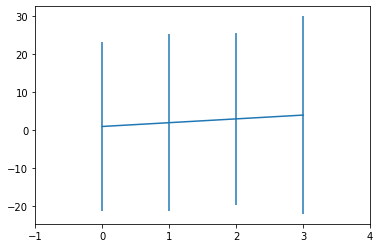

In [7]:
import numpy as np
import scipy.stats as ss
data_m=np.array([1,2,3,4])   #(Means of your data)
data_df=np.array([5,6,7,8])   #(Degree-of-freedoms of your data)
data_sd=np.array([11,12,12,14])   #(Standard Deviations of your data)

import matplotlib.pyplot as plt
plt.errorbar([0,1,2,3], data_m, yerr=ss.t.ppf(0.95, data_df)*data_sd)
plt.xlim((-1,4))

# 失敗吃虧的kapteyn

In [2]:
'''信賴區間'''
import numpy as np

mu = [.40, .38, .39, .35, .37, .33, .34, .28, .11, .24,
      .03, .07, .01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]     
rep_num=10
x=(20-np.arange(20))**2

data = np.zeros((20, rep_num))
for i in range(13):
    data[i] = np.clip(np.random.normal(loc=mu[i], scale=0.1, size=rep_num), 0., 1.)

(-0.01, 0.7)

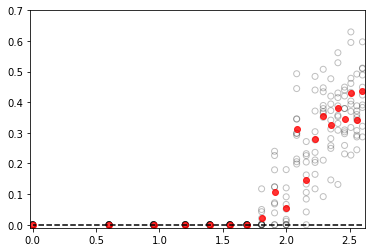

In [3]:
import matplotlib.pyplot as plt

plt.scatter(np.log10(np.tile(x[:,None], rep_num)), data, 
            facecolors='none', edgecolors='k', alpha=0.25)
plt.plot(np.log10(x), data.mean(1), 'ro', alpha=0.8)
plt.plot(np.log10(x), np.repeat(0., 20), 'k--')
plt.xlim(-0.02, np.max(np.log10(x)) + 0.02)
plt.ylim(-0.01, 0.7)

In [4]:
from kapteyn import kmpfit

threshold = 0.02
reg_x = np.log10(x)[data.mean(1)>threshold]
reg_y = data.mean(1)[data.mean(1)>threshold]

# Set model to fit.
def model(p, x):
    a, b, c = p
    return a + b*x + c*x**2

# Perform fit.
f = kmpfit.simplefit(model, [.1, .1, .1], reg_x, reg_y)
x = np.linspace(0, 3, 100)
plt.plot(x, model(f.params, x), linestyle='-', color='black', marker='')

ModuleNotFoundError: No module named 'kapteyn'

In [7]:
# Partial derivatives:
dfdp = [1., reg_x, reg_x**2]
_, ci_upper, ci_lower = f.confidence_band(reg_x, dfdp, 0.95, model)
# Plot.
plt.plot(reg_x, ci_upper, linestyle='--', color='black', marker='')
plt.plot(reg_x, ci_lower, linestyle='--', color='black', marker='')

p_upper, p_lower = prediction_band(*args, **kwargs)
plt.fill_between(reg_x, p_upper, p_lower, facecolor='blue', alpha=0.2, linestyle='')

NameError: name 'reg_x' is not defined

In [ ]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
import pylab as plot

a = '新特徵資料_noerror.csv'
data = np.genfromtxt(a, dtype = None, delimiter = ',', skip_header = 0, filling_values = 0, invalid_raise = False, encoding = 'latin-1')
[Row,Column] = data.shape
print(data[0:2,:])

In [ ]:
'''Correlation between features and soh'''
for i in range(1,7,1):
    R2 = np.round(np.corrcoef(data[:,0], data[:,i])[0][1]**2,3)
    r2 = np.round(r2_score(data[:,0], data[:,i]),3)
    MAE = np.round(mean_absolute_error(data[:,0], data[:,i]),3)
    RMSE = np.round(np.sqrt(mean_squared_error(data[:,0], data[:,i])),3)
    ft = ["soh","   Chr"," rex03","  inft","   V15"," Dis0_Time","  VPVD"]
    print(f"{ft[i]}" + " = ", [R2, r2, MAE, RMSE])
    # 畫圖
    plt.figure(figsize=(6,6))
    plt.plot(data[:,i], data[:,0], 'b.');     #
    m1, b1 = np.polyfit(data[:,i], data[:,0], 1);
    plt.axline(xy1=(0, b1), slope=m1, color='g', label=f'$y = {m1:.3f}x {b1:+.3f}$\n  R2 = {R2}') # 
    plt.xlim(min(data[:,i])-0.1, max(data[:,i])+0.1)
    plt.ylim(-5, 105)
    plt.xlabel(f"{ft[i]}", fontsize=15)
    plt.ylabel("SOH", fontsize=15)
    plt.title("Correlation between" + f"{ft[i]}" + " and SOH", fontsize=20);
    plt.legend(fontsize=15)
    plt.show();  #save as jpg